# I. Importing libraries and dataset 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stat
from src import LogisticRegression_with_p_values, LinearRegression, create_summary_table
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stat
import pickle
import seaborn as sns
sns.set()
import warnings
warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = None

In [2]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

# II. Explore Data

In [3]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [4]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]
loan_data_defaults.isnull().sum()

Unnamed: 0.1                                                           0
Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                         

In [5]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace = True)

# Independent Variables

# Dependent Variables

In [6]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

In [7]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [8]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

In [9]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

In [10]:
# loan_data_defaults.to_csv('loan_data_defaults.csv')

# Explore Dependent Variables

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

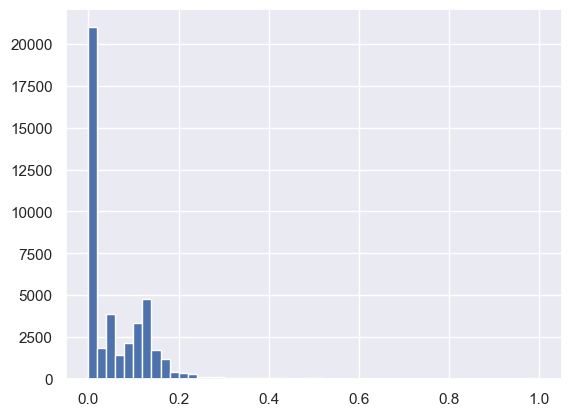

In [11]:
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)

In [12]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)
loan_data_defaults['recovery_rate_0_1'].head()

1     1
8     1
9     1
12    1
14    1
Name: recovery_rate_0_1, dtype: int32

# III. LGD model

## 1. Logistic regression - stage 1 model

### Train, test split

In [13]:
X_stage1_train, X_stage1_test, y_stage1_train, y_stage1_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 42)

### Preparing the inputs

In [14]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [15]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [16]:
X_stage1_train = X_stage1_train[features_all]
X_stage1_train = X_stage1_train.drop(features_reference_cat, axis = 1)

In [17]:
X_stage1_train.isnull().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

### Estimating the Model

In [18]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(X_stage1_train, y_stage1_train)

In [19]:
summary_table = create_summary_table(reg_lgd_st_1)
summary_table

,Feature name,Coefficients,p-values
0,Intercept,-8.540029e-05,NaN
1,grade:A,-1.040248e-05,0.999901
2,grade:B,-6.577706e-05,0.999227
3,grade:C,-1.294347e-04,0.998427
4,grade:D,2.029042e-05,0.999763
5,grade:E,1.482898e-05,0.999843
6,grade:F,7.318633e-05,0.999327
7,home_ownership:MORTGAGE,-3.476496e-05,0.998903
8,home_ownership:NONE,8.897093e-07,0.999999
9,home_ownership:OTHER,5.903840e-07,0.999999


### Testing the Model

In [20]:
X_stage1_test = X_stage1_test[features_all]
X_stage1_test = X_stage1_test.drop(features_reference_cat, axis = 1)

In [21]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(X_stage1_test)
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 1])

In [22]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(X_stage1_test)
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

array([0.59664923, 0.60799373, 0.46508122, ..., 0.5044249 , 0.57576904,
       0.53220086])

In [23]:
y_stage1_test_temp = y_stage1_test
y_stage1_test_temp.reset_index(drop = True, inplace = True)

In [24]:
df_actual_predicted_probs = pd.concat([y_stage1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis = 1)
df_actual_predicted_probs.columns = ['y_stage1_test', 'y_hat_test_proba_lgd_stage_1']
df_actual_predicted_probs.index = X_stage1_test.index
df_actual_predicted_probs.head()

,y_stage1_test,y_hat_test_proba_lgd_stage_1
178928,1,0.596649
69814,1,0.607994
101396,0,0.465081
463268,1,0.553792
253729,0,0.403859


### Estimating the Аccuracy of the Мodel

In [25]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [26]:
pd.crosstab(df_actual_predicted_probs['y_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1010,2752
1,693,4193


In [27]:
pd.crosstab(df_actual_predicted_probs['y_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.116790,0.318224
1,0.080134,0.484852


In [28]:
(pd.crosstab(df_actual_predicted_probs['y_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['y_stage1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6016419981498612

In [29]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['y_stage1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC curve')

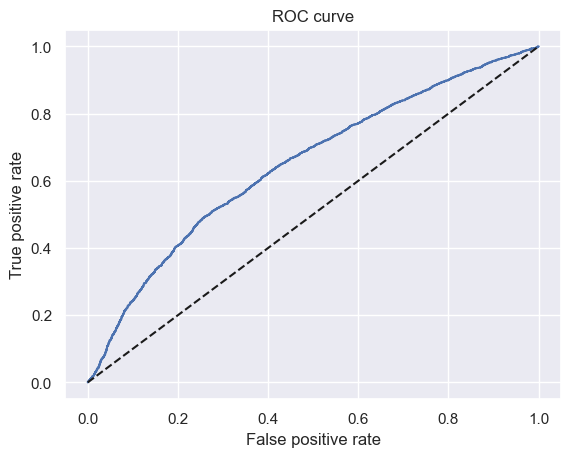

In [30]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [31]:
AUROC = roc_auc_score(df_actual_predicted_probs['y_stage1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6481202028253754

In stage 1, the key priority is correctly identifying cases where LGD > 0 (where the bank will incur a loss). Misclassifying an LGD = 0 case as > 0 is less harmful because stage 2 can still predict an LGD close to zero and effectively correct the mistake. However, if stage 1 incorrectly predicts an actual loss case (LGD > 0) as LGD = 0, stage 2 will never be applied, and the loss will be entirely missed.

### Saving the Model

In [32]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))

In [33]:
pickle.dump(features_all, open('feature_list_lgd', 'wb'))
pickle.dump(features_reference_cat, open('ref_categories_lgd', 'wb'))

## 2. Linear Regression - stage 2 model

### Train, test split

In [34]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]   

In [35]:
X_stage2_train, X_stage2_test, y_stage2_train, y_stage2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

### Preparing the inputs

In [36]:
X_stage2_train = X_stage2_train[features_all]
X_stage2_train = X_stage2_train.drop(features_reference_cat, axis = 1)

### Estimating the Model

In [37]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(X_stage2_train, y_stage2_train)

LinearRegression()

In [38]:
summary_table = create_summary_table(reg_lgd_st_2)
summary_table

,Feature name,Coefficients,p-values
0,Intercept,0.240686,NaN
1,grade:A,-0.068269,0.000000
2,grade:B,-0.068269,0.000000
3,grade:C,-0.068269,0.000000
4,grade:D,-0.068269,0.000000
5,grade:E,-0.068269,0.001919
6,grade:F,-0.068269,0.274869
7,home_ownership:MORTGAGE,-0.068269,0.060503
8,home_ownership:NONE,-0.068269,0.000091
9,home_ownership:OTHER,-0.068269,0.643693


### Testing the Model

In [39]:
X_stage2_test = X_stage2_test[features_all]
X_stage2_test = X_stage2_test.drop(features_reference_cat, axis = 1)

In [40]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(X_stage2_test)

In [41]:
y_stage2_test_temp = y_stage2_test
y_stage2_test_temp = y_stage2_test_temp.reset_index(drop = True)

### Linear Regression Evaluation

Correlation between actual and predicted values

In [42]:
pd.concat([y_stage2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.307996
0,0.307996,1.000000


This is weak to moderate positive correlation in general, but satisfactory for an LGD model. 

Residual 

<Axes: xlabel='recovery_rate', ylabel='Density'>

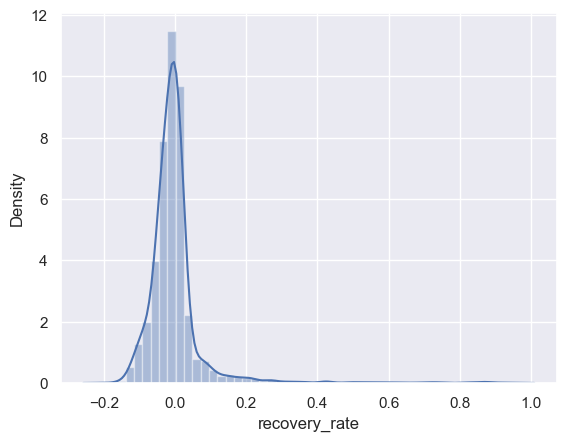

In [43]:
sns.distplot(y_stage2_test - y_hat_test_lgd_stage_2)

Distribution resembles a normal distribution, and most of the residuals are symmetrically distributed around zero. it seems to be a very good model.

In [44]:
pickle.dump(reg_lgd_st_2, open('lgd_model_stage_2.sav', 'wb'))

## 3. Combining Stage 1 and Stage 2

### Estimating recovery rate for test set

In [45]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(X_stage1_test)
y_hat_test_lgd_stage_2_all

array([0.1193906 , 0.09605635, 0.13367631, ..., 0.12078611, 0.11587422,
       0.15667447])

When stage 1 predicts 0, the stage 2 output is zeroed out; when stage 1 predicts 1, the stage 2 output remains unchanged.

In [46]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [47]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.086712
std,0.050016
min,-0.007634
25%,0.063224
50%,0.100789
75%,0.123210
max,0.236973


Clipping prediction values into the 0–1 range.

In [48]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

# IV. Estimating recovery rate for whole data set

In [49]:
loan_data_preprocessed.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad
0,0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,...,0,0,0,0,0,0,0,1,0,1
1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,...,0,0,0,0,0,0,0,1,0,0
2,2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,...,0,0,0,0,0,0,0,1,0,1
3,3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,...,0,0,0,0,0,0,0,1,0,1
4,4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,...,0,0,0,0,0,0,0,1,0,1


In [50]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace = True)
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace = True)

In [51]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis = 1)

In [52]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [53]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [54]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

Calculating lgd

In [55]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.920428
std           0.057608
min           0.371789
25%           0.873325
50%           0.899470
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [56]:
loan_data_preprocessed['LGD'].to_csv('LGD.csv', index=True)